#Librerías

##Librerías básicas

In [ ]:
import pandas as pd
import sklearn as sk
from sklearn import model_selection
from sklearn import ensemble
from sklearn import metrics
import numpy as np
import scipy as sp
import random

##Gráficos

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

##Imputación

In [ ]:
from sklearn.impute import SimpleImputer
from sklearn.impute import KNNImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.impute import MissingIndicator

##Selección de atributos

In [ ]:
from sklearn.feature_selection import chi2, SelectKBest, VarianceThreshold, RFE, SequentialFeatureSelector

##Procesamiento de texto

In [ ]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
from nltk import word_tokenize
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
from nltk.stem import WordNetLemmatizer

from sklearn.feature_extraction.text import CountVectorizer

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


##Balanceo

In [ ]:
! pip install -U -q imbalanced-learn

     |████████████████████████████████| 199 kB 9.8 MB/s 
     |████████████████████████████████| 199 kB 47.8 MB/s 


In [ ]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import ADASYN

# Lectura de datos

##Carga de datos

In [ ]:
!gdown -q --fuzzy https://drive.google.com/file/d/1W2ZvJq9sOXeAhOScdaY1gUKP_10QZUkI/view?usp=sharing
!unzip /content/udemy.zip 

Archive:  /content/udemy.zip
  inflating: udemy_entrenamiento.xlsx  
  inflating: udemy_prueba.xlsx       


In [ ]:
df_entrenamiento = pd.read_excel('/content/udemy_entrenamiento.xlsx', index_col="id", parse_dates=['created_date', 'published_date', 'last_update_date'])

In [ ]:
df_prueba = pd.read_excel('/content/udemy_prueba.xlsx', index_col="id", parse_dates=['created_date', 'published_date', 'last_update_date'])

In [ ]:
df_entrenamiento['bestseller'] = df_entrenamiento['bestseller'].map({'yes': 'si', 'no': 'no'})

##Un pequeño vistazo

In [ ]:
df_entrenamiento.head()

,title,headline,is_practice_test_course,bestseller,captions,rating,num_published_lectures,num_published_practice_tests,locale,created_date,instructional_level_simple,published_date,last_update_date,content_info_short,instructors,category,subcategory,objectives,list_price,discount_price
id,,,,,,,,,,,,,,,,,,,,
1,Aprende a tocar Piano o Teclado (Desde nivel b...,Curso completo de Piano con TEORÍA para el fun...,False,no,es_LA,4.535809,58,1,es_LA,2012-01-26,Todos los niveles,2012-01-26,2021-05-19,4 horas,121211,Música,Piano,Aprende Piano desde nivel básico. Estudiaras l...,$34.99,$12
2,Curso Hipoterapia y Rehabilitacion Ecuestre On...,"Terapias asistidas por Caballos (Hipoterapia, ...",False,no,es_ES,4.133590,32,0,es_ES,2012-06-10,Principiante,2012-06-10,2015-12-17,10 horas,236127,Estilo de vida,Adiestramiento de mascotas,La Hipoterapia y la Psicología.La Hipoterapia ...,$99.99,NaN
3,Curso SEO Online,Curso SEO práctico. Aprenda a posicionar su si...,False,no,es_ES,3.841912,76,0,es_ES,2011-06-13,Todos los niveles,2012-07-03,2020-02-28,"6,5 horas",3851,Marketing,SEO,Entender los fundamentos del SEO.Aprender a ha...,$94.99,$12
4,Aprende CSS3 sin dolor,"Realiza animaciones asombrosas, antes imposibl...",False,no,es_MX,4.039739,68,0,es_MX,2012-08-30,Intermedio,2012-08-31,2019-09-08,"9,5 horas",171706,Desarrollo,CSS,El alumno conocerá las principales característ...,$19.99,$12
5,"Aprende Javascript, HTML5 y CSS3",Aprende los principales lenguajes que dominan ...,False,si,NaN,4.643154,550,0,es_MX,2012-08-30,Todos los niveles,2012-09-02,2021-03-04,"70,5 horas",171706,Desarrollo,JavaScript,"Desarrollar páginas dinámicas con JavaScript, ...",$29.99,$12


In [ ]:
df_prueba.head()

,title,headline,is_practice_test_course,bestseller,captions,rating,num_published_lectures,num_published_practice_tests,locale,created_date,instructional_level_simple,published_date,last_update_date,content_info_short,instructors,category,subcategory,objectives,list_price,discount_price
id,,,,,,,,,,,,,,,,,,,,
11088,Desarrolla Juegos 2D en Unity hasta publicarlo...,Juegos 2d todo lo necesario para crear un jueg...,False,NaN,es_ES,5.000000,21,0,es_ES,2021-03-01,Principiante,2021-03-21,2021-03-04,4 horas,116249520,Informática y software,Desarrollo de juegos para móviles,Aprenderás todos los conceptos básicos para u...,$19.99,$12
11089,React Native: Aplicaciones nativas para IOS y ...,"TypeScript, React Native CLI, Google y Apple m...",False,NaN,es_LA,4.878622,380,0,es_LA,2021-03-01,Todos los niveles,2021-04-04,2021-06-14,"43,5 horas",11767934,Desarrollo,API de Google Maps,React Native.Crear aplicaciones móviles nativa...,$89.99,$12
11090,Introducción a Internet de las cosas con Micro...,Aprende como ingresar al mundo del Internet de...,False,NaN,es_ES,4.451706,32,0,es_ES,2021-03-01,Principiante,2021-04-06,2021-05-27,"1,5 horas",136827143,Informática y software,MicroPython,Controlar módulos ESP32 usando el lenguaje de ...,$34.99,$12
11091,Identifica y construye a tu cliente ideal,Construir las bases sólidas del perfil de clie...,False,NaN,es_ES,5.000000,31,0,es_ES,2021-03-01,Principiante,2021-04-09,NaT,4 horas,135011368,Negocios,Personas,¿Alguna vez te has preguntado cómo empresas co...,$59.99,$12
11092,Análisis de Procesos para líderes y jefes de p...,"(Procesos, Decisiones y Costos con Teoría de R...",False,NaN,"es_MX,en_US",4.672697,15,0,es_MX,2021-03-01,Principiante,2021-04-14,2021-05-04,1 hora,34396906,Negocios,Gestión de operaciones,Analizar a fondo Procesos y Operaciones.Defini...,$24.99,NaN


# Exploración datos originales

##Tipos de datos y campos no vacíos

Nota: puede verse columnas con datos faltantes mirando a Non-Null. En este caso, tienen campos vacíos headline, captions, instructional_level_simple, last_update_date, instructors, subcategory, objectives y discount_price.

In [ ]:
df_entrenamiento.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11087 entries, 1 to 11087
Data columns (total 20 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   title                         11087 non-null  object        
 1   headline                      11086 non-null  object        
 2   is_practice_test_course       11087 non-null  bool          
 3   bestseller                    11087 non-null  object        
 4   captions                      9142 non-null   object        
 5   rating                        11087 non-null  float64       
 6   num_published_lectures        11087 non-null  int64         
 7   num_published_practice_tests  11087 non-null  int64         
 8   locale                        11087 non-null  object        
 9   created_date                  11087 non-null  datetime64[ns]
 10  instructional_level_simple    11082 non-null  object        
 11  published_date              

Tienen campos vacíos captions, last_update_date, subcategory y discount_price.

In [ ]:
df_prueba.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 239 entries, 11088 to 11326
Data columns (total 20 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   title                         239 non-null    object        
 1   headline                      239 non-null    object        
 2   is_practice_test_course       239 non-null    bool          
 3   bestseller                    0 non-null      float64       
 4   captions                      188 non-null    object        
 5   rating                        239 non-null    float64       
 6   num_published_lectures        239 non-null    int64         
 7   num_published_practice_tests  239 non-null    int64         
 8   locale                        239 non-null    object        
 9   created_date                  239 non-null    datetime64[ns]
 10  instructional_level_simple    239 non-null    object        
 11  published_date            

##Estadísticas descriptivas básicas

In [ ]:
df_entrenamiento.describe(datetime_is_numeric = True)

,rating,num_published_lectures,num_published_practice_tests,created_date,published_date,last_update_date
count,11087.000000,11087.000000,11087.000000,11087,11087,9805
mean,4.288064,43.638676,0.107062,2019-01-04 14:58:07.976909824,2019-03-13 23:26:29.429060864,2019-12-09 17:57:23.590004992
min,0.500000,0.000000,0.000000,2011-06-13 00:00:00,2012-01-26 00:00:00,2012-11-19 00:00:00
25%,4.043251,15.000000,0.000000,2018-02-19 00:00:00,2018-05-04 00:00:00,2019-04-22 00:00:00
50%,4.402418,27.000000,0.000000,2019-06-20 00:00:00,2019-09-09 00:00:00,2020-06-16 00:00:00
75%,4.641256,50.000000,0.000000,2020-05-31 00:00:00,2020-07-17 00:00:00,2021-01-13 00:00:00
max,5.000000,800.000000,6.000000,2021-02-28 00:00:00,2021-06-17 00:00:00,2021-06-22 00:00:00
std,0.554803,56.276290,0.580201,NaN,NaN,NaN


In [ ]:
df_prueba.describe(datetime_is_numeric = True)

,bestseller,rating,num_published_lectures,num_published_practice_tests,created_date,published_date,last_update_date
count,0.0,239.000000,239.000000,239.000000,239,239,228
mean,NaN,4.500996,39.380753,0.259414,2021-03-15 18:16:34.142259456,2021-04-04 00:48:12.050209280,2021-04-18 00:31:34.736841984
min,NaN,1.000000,0.000000,0.000000,2021-03-01 00:00:00,2021-03-03 00:00:00,2021-03-03 00:00:00
25%,NaN,4.331971,13.000000,0.000000,2021-03-08 12:00:00,2021-03-19 00:00:00,2021-03-23 00:00:00
50%,NaN,4.640621,27.000000,0.000000,2021-03-16 00:00:00,2021-03-28 00:00:00,2021-04-11 12:00:00
75%,NaN,4.947940,48.000000,0.000000,2021-03-24 00:00:00,2021-04-16 00:00:00,2021-05-13 18:00:00
max,NaN,5.000000,380.000000,6.000000,2021-03-31 00:00:00,2021-06-17 00:00:00,2021-06-20 00:00:00
std,NaN,0.620871,48.484267,0.974283,NaN,NaN,NaN


In [ ]:
df_entrenamiento.corr()

,is_practice_test_course,rating,num_published_lectures,num_published_practice_tests
is_practice_test_course,1.000000,-0.067705,-0.101295,0.820798
rating,-0.067705,1.000000,0.102981,-0.042436
num_published_lectures,-0.101295,0.102981,1.000000,-0.071914
num_published_practice_tests,0.820798,-0.042436,-0.071914,1.000000


In [ ]:
df_entrenamiento.describe(include = 'object')

,title,headline,bestseller,captions,locale,instructional_level_simple,content_info_short,instructors,category,subcategory,objectives,list_price,discount_price
count,11087,11086,11087,9142,11087,11082,11087,11086,11087,11068,11086,11087,10103
unique,11009,10864,2,57,6,4,264,5283,13,1867,10895,29,12
top,Curso de Automaquillaje,Soft Skill,no,es_ES,es_ES,Todos los niveles,1 hora,31832740,Informática y software,Excel,Obtener los conocimientos suficientes para abo...,$19.99,$12
freq,3,12,8887,5312,6575,5119,1246,69,1757,149,17,3776,8787


In [ ]:
df_prueba.describe(include = 'object')

,title,headline,captions,locale,instructional_level_simple,content_info_short,instructors,category,subcategory,objectives,list_price,discount_price
count,239,239,188,239,239,239,239,239,238,239,239,230
unique,236,234,11,6,4,63,212,13,197,236,15,2
top,Lengua de señas mexicana,¡Su Hij@ Puede Hablar Inglés Con Confianza de ...,es_ES,es_ES,Todos los niveles,2 horas,46081654,Informática y software,Idioma inglés,Conocer y aprender la lengua de señas mexicana...,$19.99,$12
freq,2,3,113,150,114,22,3,62,8,2,89,229


##Exploración de repetidos

In [ ]:
# Veo si hay duplicados
print(df_entrenamiento.duplicated().value_counts()) # 53 duplicados
print(df_prueba.duplicated().value_counts()) # 3 duplicados

False    11034
True        53
dtype: int64
False    236
True       3
dtype: int64


Pendiente: analizar si los repetidos alteran el balance de bestseller para peor



##Exploración de variables

###Rating

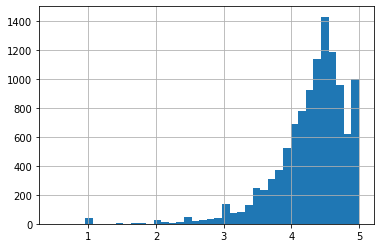

In [ ]:
df_entrenamiento['rating'].hist(bins = 40);

In [ ]:
for i in [2.5,3,3.5]:
  print((df_entrenamiento.rating < i).sum())

135
302
830


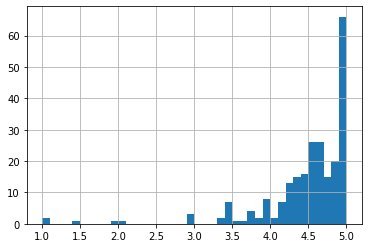

In [ ]:
df_prueba.rating.hist(bins = 40);

Hay pocos puntajes debajo de ciertos umbrales, quizás puede filtrarse un poco el conjunto de entrenamiento

In [ ]:
for i in [2.5,3,3.5]:
  print((df_prueba.rating < i).sum())

5
6
12


In [ ]:
for i in [4,4.5]:
  print((df_prueba.rating > i).sum())

206
153


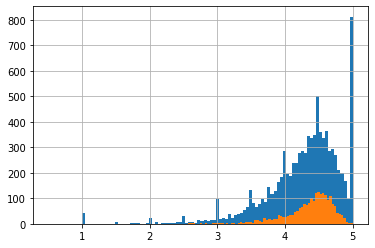

In [ ]:
ax = df_entrenamiento.loc[df_entrenamiento['bestseller'] == 'no','rating'].hist(bins = 100);
df_entrenamiento.loc[df_entrenamiento['bestseller'] == 'si','rating'].hist(bins = 100, ax = ax);

Las distribuciones para bestsellers y no bestsellers son diferentes.

In [ ]:
U,p = sp.stats.mannwhitneyu(df_entrenamiento.loc[df_entrenamiento['bestseller'] == 'no','rating'], df_entrenamiento.loc[df_entrenamiento['bestseller'] == 'si','rating'])
print('p-valor es ',p)

p-valor es  0.0015628527138570963


In [ ]:
df_entrenamiento.loc[df_entrenamiento['bestseller'] == 'si','rating'].min()

1.5302486

In [ ]:
for i in [2.5,3,3.5]:
  print(((df_entrenamiento['bestseller'] == 'si') & (df_entrenamiento.rating < i)).sum())

3
23
72


Probabilidad de ser bestseller dependiendo del rating

In [ ]:
for i in [2.5,3,3.5,4,4.5]:
  print(((df_entrenamiento['bestseller'] == 'si') & (df_entrenamiento.rating < i)).sum()/(df_entrenamiento.rating < i).sum())

0.022222222222222223
0.076158940397351
0.08674698795180723
0.13442622950819672
0.1962588625735405


Muchos de los que tienen puntaje igual a 5 no son bestsellers, eso quizás arruina el modelo.

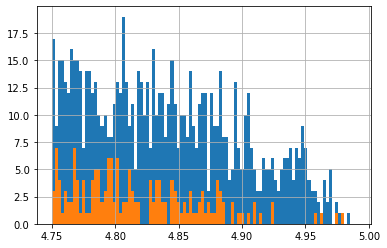

In [ ]:
ax = df_entrenamiento.loc[df_entrenamiento['bestseller'] == 'no','rating'].hist(bins = 100, range = (4.75,4.99));
df_entrenamiento.loc[df_entrenamiento['bestseller'] == 'si','rating'].hist(bins = 100, ax = ax, range = (4.75,4.99));

In [ ]:
(df_entrenamiento.rating == 5).sum()

779

In [ ]:
((df_entrenamiento.rating == 5) & (df_entrenamiento.bestseller == 'si')).sum()

3

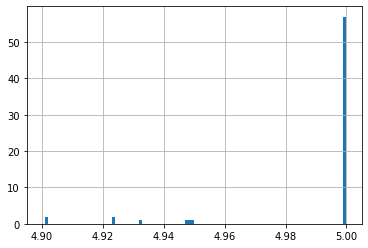

In [ ]:
df_prueba.rating.hist(bins = 100, range = (4.9,5));

In [ ]:
(df_prueba.rating == 5).sum()

57

###Precios

Conviene explorar precios tras limpiarlos (ver sección de exploración de datos procesados)

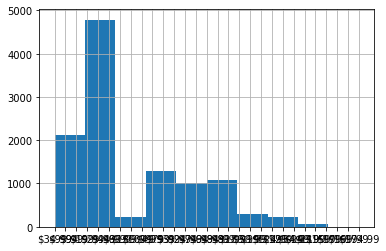

In [ ]:
df_entrenamiento['list_price'].hist();

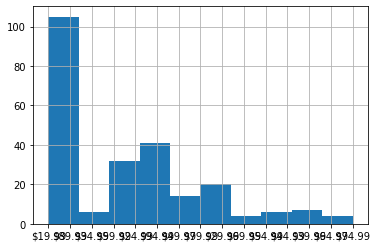

In [ ]:
df_prueba.list_price.hist();

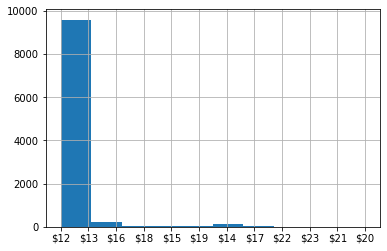

In [ ]:
df_entrenamiento['discount_price'].hist();

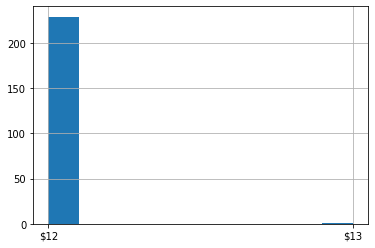

In [ ]:
df_prueba.discount_price.hist();

###Locale

(esto no está considerando aquellos casos en los que locale está vacío)

In [ ]:
df_entrenamiento['locale'].value_counts()

es_ES    6575
es_LA    2381
es_MX    1444
es_CO     430
es_VE     156
es_CL     101
Name: locale, dtype: int64

In [ ]:
df_prueba.locale.value_counts()

es_ES    150
es_LA     51
es_MX     27
es_VE      5
es_CO      5
es_CL      1
Name: locale, dtype: int64

In [ ]:
df_entrenamiento.loc[df_entrenamiento.bestseller == 'si','locale'].value_counts()

es_ES    1221
es_LA     560
es_MX     290
es_CO      81
es_VE      34
es_CL      14
Name: locale, dtype: int64

###Captions

Puede verse como solo alguna de las posibilidades concentran la mayoría de los cursos.

In [ ]:
df_entrenamiento.captions.value_counts()

es_ES                                                                                                                5312
es_LA                                                                                                                1946
es_MX                                                                                                                1198
es_CO                                                                                                                 375
es_VE                                                                                                                 123
es_CL                                                                                                                  81
es_ES,en_US                                                                                                            15
en_US                                                                                                                   9
es_LA,en_US             

In [ ]:
df_prueba.captions.value_counts()

es_ES                113
es_LA                 40
es_MX                 23
es_CO                  4
es_VE                  2
es_MX,en_US            1
en_US,es_CO            1
en_US,es_ES,pt_BR      1
en_US,es_LA            1
es_ES,en_US            1
es_CL                  1
Name: captions, dtype: int64

In [ ]:
set(df_prueba.captions.unique())-set(df_entrenamiento.captions.unique())

{'en_US,es_ES,pt_BR'}

###Content_info_short

Conviene desagregar en dos columnas para horas y preguntas.

In [ ]:
df_entrenamiento.content_info_short.value_counts()

1 hora           1246
1,5 horas        1209
2 horas          1071
2,5 horas         892
3 horas           722
                 ... 
59 horas            1
175 preguntas       1
168 preguntas       1
81,5 horas          1
28 minutos          1
Name: content_info_short, Length: 264, dtype: int64

In [ ]:
df_entrenamiento.content_info_short.unique()

array(['4 horas', '10 horas', '6,5 horas', '9,5 horas', '70,5 horas',
       '20,5 horas', '2 horas', '63,5 horas', '6 horas', '25 horas',
       '8 horas', '7,5 horas', '2,5 horas', '3 horas', '3,5 horas',
       '26,5 horas', '1,5 horas', '7 horas', '4,5 horas', '42 minutos',
       '5,5 horas', '9 horas', '5 horas', '1 hora', '15 horas',
       '34 minutos', '14,5 horas', '39 minutos', '12 horas', '11 horas',
       '43 minutos', '14 horas', '28,5 horas', '13 horas', '15,5 horas',
       '8,5 horas', '30 minutos', '19 horas', '32 minutos', '36 minutos',
       '31 minutos', '38 minutos', '13,5 horas', '29,5 horas',
       '21,5 horas', '17,5 horas', '12,5 horas', '16,5 horas',
       '10,5 horas', '19,5 horas', '35 minutos', '20 horas', '61 horas',
       '37 minutos', '28 horas', '18,5 horas', '41 minutos', '35,5 horas',
       '32,5 horas', '17 horas', '11,5 horas', '45,5 horas', '23 horas',
       '24 horas', '31,5 horas', '40 minutos', '25,5 horas', '29 horas',
       '41 horas'

In [ ]:
df_prueba.content_info_short.value_counts()

2 horas          22
1,5 horas        21
3,5 horas        21
1 hora           20
2,5 horas        16
                 ..
310 preguntas     1
64 preguntas      1
107 preguntas     1
28 horas          1
309 preguntas     1
Name: content_info_short, Length: 63, dtype: int64

In [ ]:
df_prueba.content_info_short.unique()

array(['4 horas', '43,5 horas', '1,5 horas', '1 hora', '3 horas',
       '5,5 horas', '4,5 horas', '3,5 horas', '20,5 horas', '2,5 horas',
       '43 minutos', '12,5 horas', '2 horas', '9,5 horas', '22,5 horas',
       '7,5 horas', '39 minutos', '42 minutos', '5 horas', '30 minutos',
       '600 preguntas', '8,5 horas', '30,5 horas', '13,5 horas',
       '41 minutos', '250 preguntas', '28,5 horas', '6 horas',
       '6,5 horas', '10 horas', '934 preguntas', '80 preguntas',
       '9 horas', '36 horas', '7 horas', '11,5 horas', '16 horas',
       '17,5 horas', '310 preguntas', '38 minutos', '64 preguntas',
       '107 preguntas', '28 horas', '15,5 horas', '60 preguntas',
       '8 horas', '21 horas', '40 preguntas', '27 horas', '22 horas',
       '34 minutos', '61 horas', '325 preguntas', '17 horas', '15 horas',
       '33 minutos', '14,5 horas', '19 horas', '44 minutos', '32 minutos',
       '12 horas', '10,5 horas', '309 preguntas'], dtype=object)

Valores que están en prueba pero no en entrenamiento

In [ ]:
set(df_prueba.content_info_short.unique()) - set(df_entrenamiento.content_info_short.unique())

{'309 preguntas', '325 preguntas', '64 preguntas', '934 preguntas'}

###is_practice_test_course

In [ ]:
(df_entrenamiento.is_practice_test_course == True).sum()

186

In [ ]:
(df_entrenamiento.is_practice_test_course == False).sum()

10901

In [ ]:
(df_prueba.is_practice_test_course == True).sum()

12

In [ ]:
(df_prueba.is_practice_test_course == False).sum()

227

In [ ]:
((df_entrenamiento.is_practice_test_course == True) & (df_entrenamiento.bestseller == 'si')).sum()

32

In [ ]:
((df_entrenamiento.is_practice_test_course == False) & (df_entrenamiento.bestseller == 'si')).sum()

2168

In [ ]:
df_entrenamiento.loc[df_entrenamiento.is_practice_test_course, ['content_info_short', 'is_practice_test_course']]
# content_info_short esta en preguntas

,content_info_short,is_practice_test_course
id,,
2820,120 preguntas,True
3577,3 preguntas,True
3581,17 preguntas,True
3752,70 preguntas,True
3829,4 preguntas,True
...,...,...
10812,600 preguntas,True
10839,451 preguntas,True
10897,85 preguntas,True


Reviso rigurosamente hay una relación entre preguntas y el valor True

In [ ]:
df_entrenamiento.content_info_short.str.contains('pregunta').equals(df_entrenamiento.is_practice_test_course)

True

In [ ]:
df_prueba.content_info_short.str.contains('pregunta').equals(df_prueba.is_practice_test_course)

True

In [ ]:
df_entrenamiento.loc[df_entrenamiento.is_practice_test_course == False, ['content_info_short', 'is_practice_test_course']]

,content_info_short,is_practice_test_course
id,,
1,4 horas,False
2,10 horas,False
3,"6,5 horas",False
4,"9,5 horas",False
5,"70,5 horas",False
...,...,...
11083,"7,5 horas",False
11084,"13,5 horas",False
11085,4 horas,False


Reviso rigurosamente si hay una relación entre la cantidad de tiempo y False

In [ ]:
(df_entrenamiento.content_info_short.str.contains('hora|minuto')).equals(df_entrenamiento.is_practice_test_course == False)

True

In [ ]:
(df_prueba.content_info_short.str.contains('hora|minuto')).equals(df_prueba.is_practice_test_course == False)

True

In [ ]:
df_entrenamiento.loc[df_entrenamiento.is_practice_test_course, ['num_published_practice_tests', 'is_practice_test_course']]

,num_published_practice_tests,is_practice_test_course
id,,
2820,6,True
3577,2,True
3581,2,True
3752,2,True
3829,2,True
...,...,...
10812,4,True
10839,6,True
10897,3,True


Reviso rigurosamente si hay una relación entre test de práctica publicados y el valor True

In [ ]:
(df_entrenamiento.num_published_practice_tests > 0).equals(df_entrenamiento.is_practice_test_course)

False

In [ ]:
(df_prueba.num_published_practice_tests > 0).equals(df_prueba.is_practice_test_course)

False

Conclusión: Puede haber tests de práctica en cursos que no son de prácticas

In [ ]:
df_entrenamiento.loc[(df_entrenamiento.is_practice_test_course == False) & (df_entrenamiento.num_published_practice_tests > 0), ['num_published_practice_tests', 'is_practice_test_course']]

,num_published_practice_tests,is_practice_test_course
id,,
1,1,False
303,1,False
443,2,False
512,1,False
871,1,False
...,...,...
11010,1,False
11031,2,False
11058,1,False


In [ ]:
df_entrenamiento.loc[df_entrenamiento.is_practice_test_course == False, ['num_published_lectures', 'is_practice_test_course']]

,num_published_lectures,is_practice_test_course
id,,
1,58,False
2,32,False
3,76,False
4,68,False
5,550,False
...,...,...
11083,32,False
11084,44,False
11085,40,False


Reviso rigurosamente si hay una relación entre alguna lectura publicada y el valor False

In [ ]:
(df_entrenamiento.num_published_lectures > 0).equals(df_entrenamiento.is_practice_test_course == False)

True

In [ ]:
(df_prueba.num_published_lectures > 0).equals(df_prueba.is_practice_test_course == False)

True

###Número de lecturas publicadas

(solo para cursos que no son de prácticas)

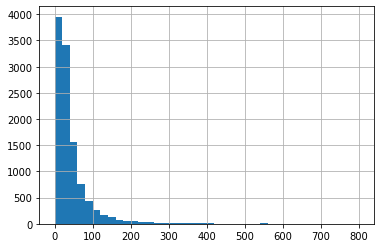

In [ ]:
df_entrenamiento.num_published_lectures.hist(bins = 40);

In [ ]:
(df_entrenamiento.num_published_lectures > 400).sum()

42

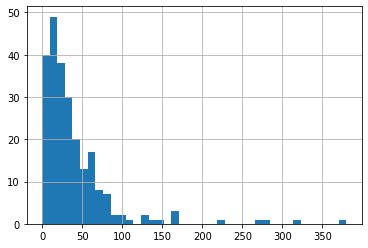

In [ ]:
df_prueba.num_published_lectures.hist(bins = 40);

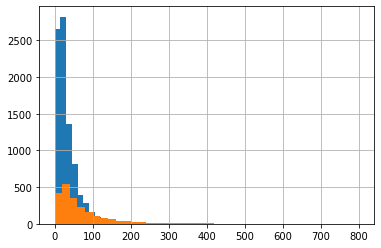

In [ ]:
ax = df_entrenamiento.loc[df_entrenamiento['bestseller'] == 'no','num_published_lectures'].hist(bins = 40)
df_entrenamiento.loc[df_entrenamiento['bestseller'] == 'si','num_published_lectures'].hist(bins = 40, ax = ax);

In [ ]:
((df_entrenamiento['bestseller'] == 'si')  & (df_entrenamiento.num_published_lectures > 450)).sum()

19

###Número de tests publicados

(no importa si es de práctica)

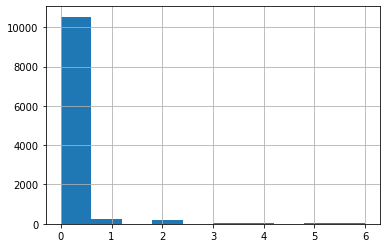

In [ ]:
df_entrenamiento.num_published_practice_tests.hist();

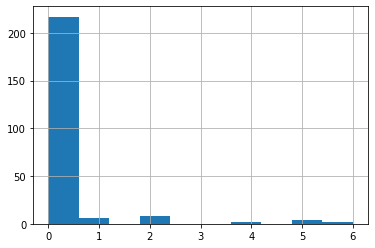

In [ ]:
df_prueba.num_published_practice_tests.hist();

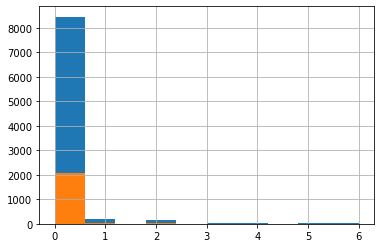

In [ ]:
ax = df_entrenamiento.loc[df_entrenamiento['bestseller'] == 'no','num_published_practice_tests'].hist()
df_entrenamiento.loc[df_entrenamiento['bestseller'] == 'si','num_published_practice_tests'].hist(ax = ax);

In [ ]:
((df_entrenamiento['bestseller'] == 'si')  & (df_entrenamiento.num_published_practice_tests > 2)).sum()

28

###Niveles de instrucción

No hay diferencias distribucionales importantes.

In [ ]:
df_entrenamiento['instructional_level_simple'].value_counts()

Todos los niveles    5119
Principiante         3751
Intermedio           1824
Experto               388
Name: instructional_level_simple, dtype: int64

In [ ]:
df_prueba.instructional_level_simple.value_counts()

Todos los niveles    114
Principiante          79
Intermedio            39
Experto                7
Name: instructional_level_simple, dtype: int64

In [ ]:
df_entrenamiento.loc[df_entrenamiento.bestseller == 'si','instructional_level_simple'].value_counts()

Todos los niveles    1154
Principiante          696
Intermedio            297
Experto                52
Name: instructional_level_simple, dtype: int64

###Categorías

Parecen similares en composición. Entonces, supongo que no es necesario sacar categorias de df_entrenamiento.

In [ ]:
df_entrenamiento['category'].value_counts()

Informática y software                 1757
Desarrollo                             1582
Enseñanzas y disciplinas académicas    1230
Negocios                               1167
Diseño                                 1108
Desarrollo personal                    1103
Marketing                               588
Salud y fitness                         557
Estilo de vida                          537
Finanzas y contabilidad                 478
Música                                  431
Productividad en la oficina             364
Fotografía y vídeo                      185
Name: category, dtype: int64

In [ ]:
df_prueba['category'].value_counts()

Informática y software                 62
Enseñanzas y disciplinas académicas    36
Desarrollo personal                    26
Desarrollo                             24
Negocios                               24
Diseño                                 16
Marketing                              12
Estilo de vida                         10
Finanzas y contabilidad                 9
Salud y fitness                         8
Música                                  5
Productividad en la oficina             4
Fotografía y vídeo                      3
Name: category, dtype: int64

In [ ]:
set(df_prueba.category.unique()) - set(df_entrenamiento.category.unique())

set()

Quizás si hay que hacer un mapa habría que usar este orden

In [ ]:
df_entrenamiento.loc[df_entrenamiento.bestseller == 'si','category'].value_counts()

Desarrollo                             633
Informática y software                 450
Diseño                                 206
Negocios                               199
Enseñanzas y disciplinas académicas    144
Marketing                              133
Desarrollo personal                    127
Productividad en la oficina             87
Finanzas y contabilidad                 68
Música                                  54
Estilo de vida                          45
Salud y fitness                         29
Fotografía y vídeo                      25
Name: category, dtype: int64

###Subcategorías

In [ ]:
df_entrenamiento['subcategory'].value_counts()

Excel                 149
Idioma inglés         106
WordPress             101
Python                 98
Photoshop              91
                     ... 
Gestión energética      1
ownCloud                1
Pintura digital         1
Krita                   1
Hidráulica              1
Name: subcategory, Length: 1867, dtype: int64

In [ ]:
df_prueba['subcategory'].value_counts()

Idioma inglés                           8
Excel                                   3
Desarrollo web                          3
Comercio bursátil                       3
Redacción de textos publicitarios       3
                                       ..
Admisión a la universidad               1
Bioquímica                              1
Photoshop                               1
Blender                                 1
Superación de traumas de la infancia    1
Name: subcategory, Length: 197, dtype: int64

In [ ]:
set(df_prueba.subcategory.unique()) - set(df_entrenamiento.subcategory.unique())

{'Analítica de sistemas',
 'Análisis modal de fallos y efectos (AMFE)',
 'Bugzilla',
 'C empotrado',
 'CISA',
 'Certificación de CyberArk',
 'Dibujo a lápiz de color',
 'Disciplined Agile Scrum Master (DASM)',
 'Gestión de operaciones',
 'ISTQB',
 'Informática distribuida',
 'Jiu-jitsu brasileño',
 'MicroPython',
 'Personas',
 'Programación con redes de Python',
 'Reiki para animales',
 'Servidor de correo electrónico',
 'Termodinámica',
 'UiPath Certified RPA Associate (UiRPA)',
 'Wing Chun'}

In [ ]:
set(df_entrenamiento.subcategory.unique()) - set(df_prueba.subcategory.unique())

{'Go (lenguaje de programación)',
 'Reiki',
 'Correr',
 'Creación de libros electrónicos',
 'Microsoft Azure DevOps',
 'Auditoría SEO',
 'Hipnoterapia',
 'AWS Certified Cloud Practitioner',
 'Telecomunicaciones',
 'Idioma coreano',
 'Astronomía',
 'Certified ScrumMaster (CSM)',
 'Aplicaciones de consola',
 'Microsoft Dynamics',
 'Sublime Text',
 'Aspen Plus',
 'Orden y organización',
 'Sistemas de información',
 'Servicios de Windows',
 'Impresión en 3D',
 'Visión computacional',
 'Microsoft 77-727',
 'Editor de texto Vim',
 'Adobe Flash',
 'Vuforia',
 'Pérdida de peso',
 'Gestión de base de datos',
 'TensorFlow',
 'CodeIgniter',
 'Microsoft AZ-900',
 'Bacula',
 'Salud intestinal',
 'Punto de venta',
 'Expresiones lambda',
 'Instrucción musical',
 'Idioma danés',
 'Herbología',
 'Gestión logística',
 'Embudo de ventas',
 'Investigación de mercado',
 'Cinema 4D',
 'Aprende a leer',
 'Editor de partituras Sibelius',
 'Fracciones',
 'Salud mental',
 'Geoespacial',
 'Idioma noruego',
 'Rea

In [ ]:
df_entrenamiento.loc[df_entrenamiento.bestseller == 'si','subcategory'].value_counts().head(50)

Excel                              47
Python                             44
WordPress                          40
PHP                                33
Java                               30
JavaScript                         28
Idioma inglés                      24
C#                                 24
Photoshop                          22
Desarrollo web                     22
Linux                              20
SQL                                19
Diseño web                         18
Liderazgo                          17
Desarrollo en Android              17
React                              16
Angular                            15
Laravel                            15
Power BI de Microsoft              15
SQL Server                         15
CSS                                14
Inversión                          14
Diseño de interiores               14
Dibujo                             13
Hacking ético                      13
Marketing en Facebook              12
Estrategia d

###Instructores

Conviene analizarlo tras imputarlo y procesarlo porque hay varios instructores (es un tipo object, tiene listas separadas por comas).

In [ ]:
df_entrenamiento.instructors.head(15)

id
1                      121211
2                      236127
3                        3851
4                      171706
5                      171706
6                       35921
7                      171706
8                      330224
9                      171706
10    269206,73216490,3311510
11                     288131
12                     398428
13                     378331
14                       3851
15                     171706
Name: instructors, dtype: object

###Titulares

In [ ]:
df_entrenamiento[df_entrenamiento.headline.isna()]

,title,headline,is_practice_test_course,bestseller,captions,rating,num_published_lectures,num_published_practice_tests,locale,created_date,instructional_level_simple,published_date,last_update_date,content_info_short,instructors,category,subcategory,objectives,list_price,discount_price
id,,,,,,,,,,,,,,,,,,,,
2192,Querying Data y Transact SQL,NaN,False,no,es_ES,3.881303,47,0,es_ES,2017-12-19,Principiante,2018-01-02,2017-12-23,"4,5 horas",31175256,Desarrollo,SQL,Crear consultas SQL desde las mas simples hast...,$89.99,$12


###Objetivos

In [ ]:
df_entrenamiento[df_entrenamiento.objectives.isna()]

,title,headline,is_practice_test_course,bestseller,captions,rating,num_published_lectures,num_published_practice_tests,locale,created_date,instructional_level_simple,published_date,last_update_date,content_info_short,instructors,category,subcategory,objectives,list_price,discount_price
id,,,,,,,,,,,,,,,,,,,,
6,Aprende a Crear un Curso Online,Miguel uno de los más exitosos instructores en...,False,si,es_ES,4.626789,76,0,es_ES,2012-08-30,Todos los niveles,2012-09-03,2016-09-07,"6,5 horas",35921,Enseñanzas y disciplinas académicas,Creación de cursos en línea,NaN,$44.99,$13


###Bestsellers

Probabilidad de ser bestseller

In [ ]:
df_entrenamiento.bestseller.value_counts() / len(df_entrenamiento)

no    0.801569
si    0.198431
Name: bestseller, dtype: float64

# Limpieza de datos



##Copia de datos

Hago copias de los dataframes originales para no tener que cargarlos cada vez que quiero correr el código de nuevo

In [ ]:
df_train = df_entrenamiento.copy()
df_test = df_prueba.copy()

##Parámetros (útil para correr la notebook entera en vez de bloque por bloque)

In [ ]:
remove_duplicates = True
discount_price_imputer = 'median' #puede ser 'median', 'list_price' o 'bfill'
#remove_todos_los_niveles = False

##Eliminación de duplicados de entrenamiento 

In [ ]:
# Saco duplicados (creo nuevo dataframe para no tener que cargar el original de nuevo si quiero empezar de cero sin remover duplicados)
if (remove_duplicates):
  df_train = df_train.drop_duplicates()

##Combinación de dataframes

In [ ]:
def glue(dftrain,dftest):
  df = pd.concat([dftrain,dftest], axis = 0)
  return df

def unglue(df):
  dftrain = df.loc[df['bestseller'].notna()]
  dftest = df.loc[df['bestseller'].isna()]
  return dftrain, dftest

In [ ]:
df = glue(df_train,df_test)

##Transformación/imputación de atributos

###Desagregar content_info_short

* Columna content_info_questions: número de preguntas. A aquellos cursos que no tienen preguntas (tienen horas/minutos) se los llena con 0.
* Columna content_info_time: pongo el tiempo expresado en horas. Aquellos cursos que estan expresados en minutos los convierto a horas. Aquellos cursos que no tienen tiempo (tienen preguntas) reciben 0.

In [ ]:
df['content_info_questions'] = df.loc[df.is_practice_test_course, 'content_info_short']
df['content_info_questions'] = df['content_info_questions'].str.split(" ").str[0]
df['content_info_questions'] = df['content_info_questions'].fillna(0)
df['content_info_questions'] = df['content_info_questions'].astype(int)

In [ ]:
df['content_info_time'] = df.loc[df.is_practice_test_course == False, 'content_info_short']
df['content_info_time_unit'] = df['content_info_time'].str.split(" ").str[1]
df['content_info_time'] = df['content_info_time'].str.split(" ").str[0]
df['content_info_time'] = df['content_info_time'].str.replace(',', '.').astype(float)
df['content_info_time'] = df['content_info_time'].fillna(0)


In [ ]:
# Convierto a horas los valores que estaban en minutos
# con .loc selecciono los cursos en minutos y los divido por 60

df.loc[df['content_info_time_unit'] == 'minutos', 'content_info_time'] = df['content_info_time'] / 60


###Imputar last_update_date

Se imputa en base a la fecha de publicación

In [ ]:
mask = df['last_update_date'].isna()

In [ ]:
df['last_update_date_imp'] = np.where(mask, True, False)

In [ ]:
df.loc[mask,'last_update_date'] = df.loc[mask,'published_date']

###Convertir precios a numéricos e imputar

In [ ]:
df['list_price'] = df['list_price'].str.strip('$').astype(float)
df['discount_price'] = df['discount_price'].str.strip('$').astype(float)

Indicación de si se imputó el descuento





In [ ]:
mask = df['discount_price'].isna()
df['discount_imp'] = np.where(mask, True, False)

Considerar añadir un indicador de imputación o KNN (para hacer eso, primero obtener tantos atributos numéricos como sea posible por transformación). Hay tres tipos de imputador: en base al precio de lista, backfill y por la mediana.

In [ ]:
if (discount_price_imputer == 'list_price'):
  # Si discount price es 0, pongo el mismo valor que list_price
  mask = df['discount_price'].isna()
  df.loc[mask, 'discount_price'] = df.loc[mask, 'list_price']
elif (discount_price_imputer == 'median'):
  imp = SimpleImputer(strategy='median')
  #el fit_transform requiere un array con cierta forma, por eso uso [] dos veces
  #puede verse comparando df['discount_price'].shape y df[['discount_price']].shape
  df['discount_price'] = imp.fit_transform(df[['discount_price']])
elif (discount_price_imputer == 'bfill'):
  df['discount_price'] = df.discount_price.fillna(method='bfill')

###Imputar/preparar Instructores

Preparo para analizar el texto luego

In [ ]:
df['instructors_copy'] = df['instructors']

In [ ]:
df['instructors_copy'].fillna('None', inplace = True)
regexp = RegexpTokenizer('\w+')
df["instructors_copy"] = df["instructors_copy"].apply(regexp.tokenize)

In [ ]:
df["instructors_copy"] = df["instructors_copy"].str.join(' ')

In [ ]:
vectorizer = CountVectorizer(analyzer='word', ngram_range=(1, 1), strip_accents='ascii', lowercase = False)
vectorized_data = vectorizer.fit_transform(df['instructors_copy'])

In [ ]:
instructors_df = pd.DataFrame(vectorized_data.toarray(), columns=vectorizer.get_feature_names_out(), index = df.index)

###Imputar/preparar Captions

Hago copias de la columna para realizar dos análisis diferentes de Captions.

In [ ]:
df['captions1'] = df.captions
df['captions2'] = df.captions

El primer análisis es sin separar lenguaje y localización

In [ ]:
df['captions1'].fillna('None', inplace = True)
regexp = RegexpTokenizer('\w+')
df["captions1"] = df["captions1"].apply(regexp.tokenize)

In [ ]:
df["captions1"] = df["captions1"].str.join(' ')

In [ ]:
vectorizer = CountVectorizer(analyzer='word', ngram_range=(1, 1), strip_accents='ascii', max_features=2000, lowercase = False)
vectorized_data = vectorizer.fit_transform(df['captions1'])

In [ ]:
captions_df = pd.DataFrame(vectorized_data.toarray(), columns=vectorizer.get_feature_names_out(), index = df.index)

El segundo los separa (la expresión regular ignora guión bajo)

In [ ]:
df['captions2'].fillna('None', inplace = True)
regexp = RegexpTokenizer('[a-zA-Z0-9]+')
df["captions2"] = df["captions2"].apply(regexp.tokenize)

In [ ]:
df["captions2"] = df["captions2"].str.join(' ')

In [ ]:
vectorizer = CountVectorizer(analyzer='word', ngram_range=(1, 1), strip_accents='ascii', max_features=2000, lowercase = False)
vectorized_data = vectorizer.fit_transform(df['captions2'])

In [ ]:
captions2_df = pd.DataFrame(vectorized_data.toarray(), columns=vectorizer.get_feature_names_out(), index = df.index)

###Imputar/preparar Titulares

In [ ]:
df['headline_copy'] = df.headline

In [ ]:
df['headline_copy'].fillna('None', inplace = True)
df['headline_copy'] = df.headline_copy.str.lower()

In [ ]:
regexp = RegexpTokenizer('\w+')
df["headline_copy"] = df.headline_copy.apply(regexp.tokenize)

In [ ]:
stopwords = nltk.corpus.stopwords.words("spanish")
stopwords.extend(['es', 'osea', 'sólo'])

df["headline_copy"] = df.headline_copy.apply(lambda texto: [token for token in texto if token not in stopwords])

In [ ]:
df["headline_copy"] = df.headline_copy.str.join(' ')

In [ ]:
vectorizer = CountVectorizer(analyzer='word', ngram_range=(1, 2), min_df=0.005, max_df=0.7, strip_accents='ascii', max_features=2000, lowercase = False)
vectorized_data = vectorizer.fit_transform(df.headline_copy)

In [ ]:
headline_df = pd.DataFrame(vectorized_data.toarray(), columns=vectorizer.get_feature_names_out(), index = df.index)

##Exploración datos procesados

###Precios

Quizás sea posible recortar un poco entrenamiento para que tenga un rango similar al conjunto a predecir.

In [ ]:
df_train, df_test = unglue(df)

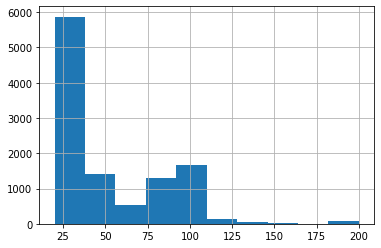

In [ ]:
df_train.list_price.hist();

In [ ]:
df_train.loc[(df_train.list_price > 95),'list_price'].count()

500

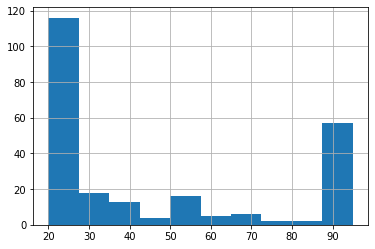

In [ ]:
df_test.list_price.hist();

In [ ]:
df_test.list_price.max()

94.99

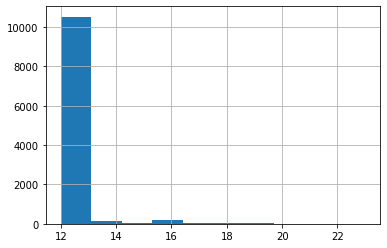

In [ ]:
df_train.discount_price.hist();

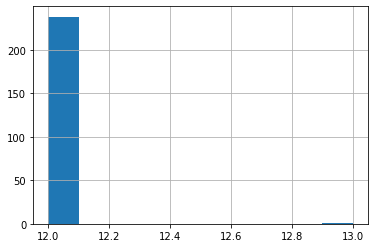

In [ ]:
df_test.discount_price.hist();

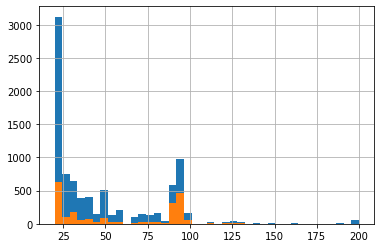

In [ ]:
ax = df.loc[df['bestseller'] == 'no','list_price'].hist(bins = 40)
df.loc[df['bestseller'] == 'si','list_price'].hist(bins = 40, ax = ax);

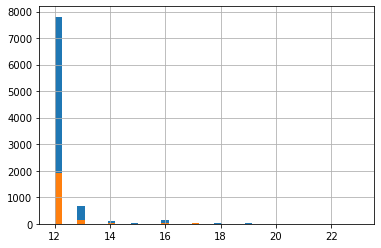

In [ ]:
ax = df.loc[df['bestseller'] == 'no','discount_price'].hist(bins = 40)
df.loc[df['bestseller'] == 'si','discount_price'].hist(bins = 40, ax = ax);

In [ ]:
df[['discount_price','list_price']].corr()

,discount_price,list_price
discount_price,1.00000,0.16415
list_price,0.16415,1.00000


###Instructores

Instructores más frecuentes, explorar relación con bestsellers también.

In [ ]:
instructors_df.sum().sort_values(ascending = False).head(25)

3311510      97
21023336     81
44966978     74
115981390    70
31832740     69
171706       58
15958398     43
18013970     38
7454352      37
16454728     35
11005030     35
114656560    34
16661812     34
48969372     33
25193680     32
38434392     31
82598714     30
23191974     28
20757364     28
5989196      28
26468880     27
11767934     27
24055080     26
9350182      26
83016206     26
dtype: int64

In [ ]:
#df_train, df_test = unglue(df)

Se analiza solo df_train

In [ ]:
#vectorizer = CountVectorizer(analyzer='word', ngram_range=(1, 1), strip_accents='ascii', max_features=2000, lowercase = False)
#vectorized_data = vectorizer.fit_transform(df_train.instructors_copy)

In [ ]:
#instructors_df_train = pd.DataFrame(vectorized_data.toarray(), columns=vectorizer.get_feature_names_out(), index = df_train.index)

In [ ]:
instructors_df_train = instructors_df.loc[df_train.index]

Lista de instructores con más bestsellers para df_train. El truco para hacer esto es que los índices de instructors_df_train son los mismos que df_train.

In [ ]:
instructors_df_train.loc[df_train.bestseller == 'si'].sum().sort_values(ascending = False).head(25)

21023336     62
44966978     57
115981390    55
3311510      55
15958398     38
16661812     31
11767934     26
11005030     26
114656560    25
16080882     25
24645730     20
68383616     20
171706       19
82598714     19
19669210     16
23191974     15
1435594      15
4748648      15
20757364     14
81115304     13
317821       13
62411504     13
38066470     13
19701574     13
21221400     11
dtype: int64

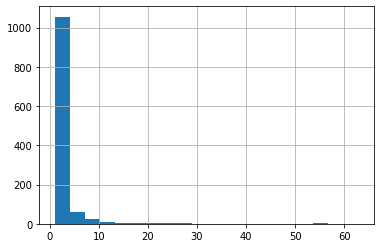

In [ ]:
instructors_df_train.loc[df_train.bestseller == 'si'].sum().sort_values(ascending = False).hist(bins = 20, range = (1,63));

In [ ]:
instructors_test = sk.feature_selection.SelectKBest(chi2, k=10).fit(instructors_df_train, df_train.bestseller) 
instructors_test.get_feature_names_out()#el orden dado no es por score, ver tabla de scores/p-valores

array(['11005030', '115981390', '11767934', '15958398', '16080882',
       '16661812', '21023336', '3311510', '44966978', '68383616'],
      dtype=object)

Scores y p-valores. Muchos instructores asociados a bestsellers (aunque probablemente no generen mucha ganancia de información como dummies)

In [ ]:
instructors_test_df = pd.DataFrame({'Scores': instructors_test.scores_,'p-values':instructors_test.pvalues_},index = instructors_test.feature_names_in_)
instructors_test_df.sort_values(by = 'Scores', ascending = False).head(10)

,Scores,p-values
21023336,162.799389,2.767245e-37
44966978,154.804389,1.545044e-35
115981390,150.950356,1.074580e-34
15958398,126.305236,2.636471e-29
16661812,108.219891,2.405534e-25
11767934,104.520473,1.555775e-24
16080882,100.500455,1.183698e-23
3311510,85.879613,1.912302e-20
68383616,69.500105,7.641046e-17
11005030,68.160371,1.507246e-16


In [ ]:
#instructors_test_df['p-values'].sort_values().to_csv('p-valores instructores.csv')

Probabilidad de ser bestseller para los instructores.

In [ ]:
n_bestseller = instructors_df_train.loc[df_train.bestseller == 'si'].sum()  
n_courses = instructors_df_train[list(n_bestseller.index)].sum() #los índices de n_bestseller son instructores que a su vez son las columnas de la bolsa de palabras
instructor_bestseller_likelihood = n_bestseller / n_courses
instructor_bestseller_likelihood

100001456    0.000000
100012850    0.000000
100020762    0.000000
100085110    0.000000
100089936    0.000000
               ...   
99877810     0.500000
99941110     0.000000
99966694     0.333333
99969530     1.000000
None         1.000000
Length: 5459, dtype: float64

In [ ]:
n_courses['None']

1

In [ ]:
(instructor_bestseller_likelihood > 0).sum()

1165

In [ ]:
(n_courses > 1).sum()

1933

In [ ]:
((instructor_bestseller_likelihood > 0) & (n_courses > 1)).sum()

773

In [ ]:
instructor_bestseller_likelihood[((instructor_bestseller_likelihood > 0) & (n_courses > 1))].mean()

0.54056750420485

In [ ]:
((instructor_bestseller_likelihood == 1) & (n_courses == 1)).sum()

392

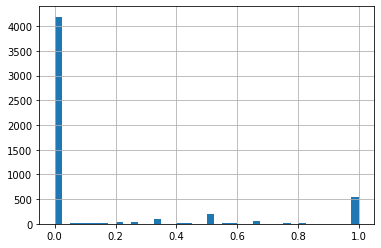

In [ ]:
instructor_bestseller_likelihood.hist(bins = 40);

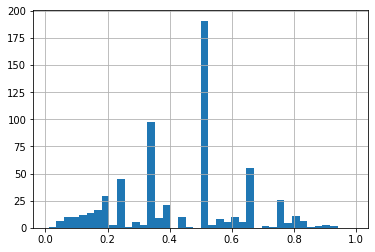

In [ ]:
instructor_bestseller_likelihood.hist(bins = 40, range = (0.01,0.99));

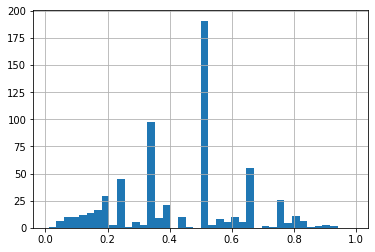

In [ ]:
instructor_bestseller_likelihood.loc[(n_courses > 1)].hist(bins = 40, range = (0.01,0.99));

In [ ]:
#prueba de concepto de asignar a cada curso la probabilidad del instructor con mayor probabilidad
#(instructors_df_train*instructor_bestseller_likelihood).max(axis = 'columns')

###Captions

El primer análisis es sin separar lenguaje y localización

In [ ]:
captions_df.sum().sort_values(ascending = False).head(25)

es_ES    5450
es_LA    2010
None     1986
es_MX    1221
es_CO     393
es_VE     130
es_CL      84
en_US      74
en_GB      23
pt_BR      19
it_IT      11
de_DE       9
fr_FR       6
en_IN       3
ru_RU       3
pt_PT       3
ja_JP       3
ko_KR       2
zh_CN       2
nl_NL       2
pl_PL       2
ar_AR       2
el_GR       1
fa_IR       1
da_DK       1
dtype: int64

In [ ]:
df_train, df_test = unglue(df)

In [ ]:
vectorizer = CountVectorizer(analyzer='word', ngram_range=(1, 1), strip_accents='ascii', max_features=2000, lowercase = False)
vectorized_data = vectorizer.fit_transform(df_train.captions1)

In [ ]:
captions_df_train = pd.DataFrame(vectorized_data.toarray(), columns=vectorizer.get_feature_names_out(), index = df_train.index)

Parece que la mayoría de los bestsellers son de habla española o inglesa

In [ ]:
captions_df_train.loc[df_train.bestseller == 'si'].sum().sort_values(ascending = False).head(15)

es_ES    1036
es_LA     469
None      347
es_MX     228
es_CO      77
es_VE      27
es_CL      13
en_US       9
en_GB       6
it_IT       2
pt_BR       1
th_TH       0
pt_PT       0
pl_PL       0
zh_CN       0
dtype: int64

In [ ]:
cap_test = sk.feature_selection.SelectKBest(chi2, k=10).fit(captions_df_train, df_train.bestseller) 
cap_test.get_feature_names_out()#el orden dado no es por score, ver tabla de scores/p-valores

array(['None', 'de_DE', 'en_US', 'es_CL', 'es_ES', 'es_LA', 'fr_FR',
       'pt_BR', 'pt_PT', 'ru_RU'], dtype=object)

Viendo los p-valores, solo puedo rechazar la independencia para es_LA y None (!)

In [ ]:
cap_test_df = pd.DataFrame({'Scores': cap_test.scores_,'p-values':cap_test.pvalues_},index = cap_test.feature_names_in_)
cap_test_df.sort_values(by = 'Scores', ascending = False).head()

,Scores,p-values
es_LA,18.763932,0.000015
None,4.791232,0.028605
pt_BR,2.328347,0.127037
de_DE,2.238796,0.134586
en_US,2.045504,0.152656


El segundo análisis los separa

In [ ]:
captions2_df.sum().sort_values(ascending = False).head(25)

es      9288
ES      5450
LA      2010
None    1986
MX      1221
CO       393
VE       130
en       100
CL        84
US        74
GB        23
pt        22
BR        19
IT        11
it        11
de         9
DE         9
fr         6
FR         6
PT         3
ja         3
ru         3
RU         3
zh         3
IN         3
dtype: int64

In [ ]:
df_train, df_test = unglue(df)

In [ ]:
vectorizer = CountVectorizer(analyzer='word', ngram_range=(1, 1), strip_accents='ascii', max_features=2000, lowercase = False)
vectorized_data = vectorizer.fit_transform(df_train.captions2)

In [ ]:
captions2_df_train = pd.DataFrame(vectorized_data.toarray(), columns=vectorizer.get_feature_names_out(), index = df_train.index)

In [ ]:
captions2_df_train.loc[df_train.bestseller == 'si'].sum().sort_values(ascending = False).head(15)

es      1850
ES      1036
LA       469
None     347
MX       228
CO        77
VE        27
en        15
CL        13
US         9
GB         6
IT         2
it         2
BR         1
pt         1
dtype: int64

In [ ]:
cap2_test = sk.feature_selection.SelectKBest(chi2, k=10).fit(captions2_df_train, df_train.bestseller) 
cap2_test.get_feature_names_out()#el orden dado no es por score, ver tabla de scores/p-valores

array(['BR', 'DE', 'FR', 'LA', 'None', 'US', 'de', 'en', 'fr', 'pt'],
      dtype=object)

Viendo los p-valores, solo puedo rechazar la independencia para LA y None

In [ ]:
cap2_test_df = pd.DataFrame({'Scores': cap2_test.scores_,'p-values':cap2_test.pvalues_},index = cap2_test.feature_names_in_)
cap2_test_df.sort_values(by = 'Scores', ascending = False).head()

,Scores,p-values
LA,18.763932,0.000015
None,4.791232,0.028605
pt,3.024860,0.081997
BR,2.328347,0.127037
DE,2.238796,0.134586


###Titulares

In [ ]:
headline_df.sum().sort_values(ascending = False).head(30)

aprende          2890
curso            1329
crear             782
paso              734
cero              670
web               575
como              449
forma             412
profesional       394
crea              392
datos             386
paso paso         355
tecnicas          325
aprende crear     316
aplicaciones      307
aprender          303
programacion      301
herramientas      297
nivel             296
basico            269
proyectos         265
manera            264
experto           263
practica          261
diseno            259
completo          252
vida              243
negocio           241
guia              240
excel             238
dtype: int64

In [ ]:
headline_df_train = headline_df.loc[df_train.index]

In [ ]:
headline_df_train.loc[df_train.bestseller == 'si'].sum().sort_values(ascending = False).head(30)

aprende          735
curso            332
web              213
cero             207
paso             207
crear            198
datos            125
aplicaciones     116
crea             110
profesional      106
forma            104
paso paso        103
programacion      99
experto           87
como              86
bases             83
proyectos         75
excel             75
sql               75
aprender          74
aprende crear     74
programar         73
diseno            72
completo          72
python            66
mundo             66
desarrollo        65
guia              60
basico            59
java              58
dtype: int64

In [ ]:
headline_df_train.loc[df_train.bestseller == 'si','python'].sum()

66

In [ ]:
headline_test = sk.feature_selection.SelectKBest(chi2, k=10).fit(headline_df_train, df_train.bestseller) 
headline_test.get_feature_names_out()#el orden dado no es por score, ver tabla de scores/p-valores

array(['angular', 'aplicaciones', 'aprende', 'cero', 'framework', 'java',
       'programar', 'react', 'sql', 'web'], dtype=object)

In [ ]:
headline_test_df = pd.DataFrame({'Scores': headline_test.scores_,'p-values':headline_test.pvalues_},index = headline_test.feature_names_in_)
headline_test_df.sort_values(by = 'Scores', ascending = False).head(30)

,Scores,p-values
web,111.953906,3.657148e-26
sql,86.407955,1.463949e-20
programar,69.515241,7.582630e-17
angular,68.487690,1.276721e-16
aprende,65.315799,6.380774e-16
aplicaciones,64.053075,1.211121e-15
cero,56.801115,4.821930e-14
react,52.935305,3.447174e-13
framework,51.627694,6.708853e-13
java,47.738819,4.869535e-12


Quizás chi2 no ayuda mucho en combinación con una bolsa de palabras.

###Preguntas

In [ ]:
df_train, df_test = unglue(df)

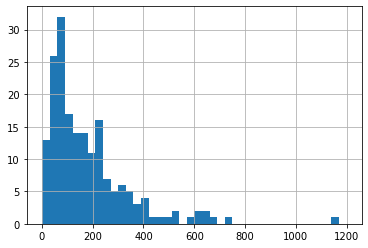

In [ ]:
df_train.content_info_questions.hist(bins = 40, range = (1,1200));

In [ ]:
(df_train.content_info_questions > 200).sum()

62

In [ ]:
((df_train.content_info_questions > 200) & (df_train.bestseller == 'si')).sum()

19

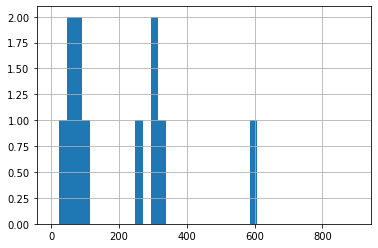

In [ ]:
df_test.content_info_questions.hist(bins = 40, range = (1,900));

In [ ]:
(df_test.content_info_questions > 200).sum()

6

###Tiempo

In [ ]:
df_train, df_test = unglue(df)

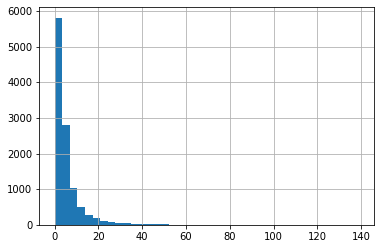

In [ ]:
df_train.content_info_time.hist(bins = 40);

In [ ]:
(df_train.content_info_time > 60).sum()

35

In [ ]:
((df_train.content_info_time > 60) & (df_train.bestseller == 'si')).sum()

27

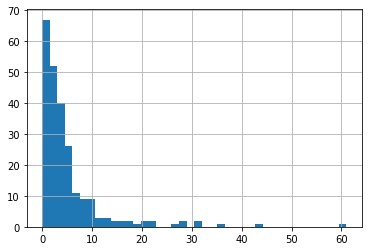

In [ ]:
df_test.content_info_time.hist(bins = 40);

In [ ]:
df_test.content_info_time.max()

61.0

###Correlaciones

In [ ]:
df.corr()

,is_practice_test_course,rating,num_published_lectures,num_published_practice_tests,list_price,discount_price,content_info_questions,content_info_time,last_update_date_imp,discount_imp
is_practice_test_course,1.000000,-0.070526,-0.103739,0.825220,-0.067069,-0.001827,0.730286,-0.092836,-0.007481,-0.024725
rating,-0.070526,1.000000,0.102297,-0.048138,0.041749,-0.058612,-0.062564,0.117020,-0.139699,0.074097
num_published_lectures,-0.103739,0.102297,1.000000,-0.075471,0.212796,0.040687,-0.075759,0.815799,-0.126146,-0.047493
num_published_practice_tests,0.825220,-0.048138,-0.075471,1.000000,-0.053294,0.008233,0.763917,-0.068866,-0.010703,-0.024460
list_price,-0.067069,0.041749,0.212796,-0.053294,1.000000,0.164150,-0.053522,0.198431,-0.078848,0.073036
discount_price,-0.001827,-0.058612,0.040687,0.008233,0.164150,1.000000,0.001495,0.023534,-0.064101,-0.084606
content_info_questions,0.730286,-0.062564,-0.075759,0.763917,-0.053522,0.001495,1.000000,-0.067797,-0.008144,-0.022024
content_info_time,-0.092836,0.117020,0.815799,-0.068866,0.198431,0.023534,-0.067797,1.000000,-0.126674,-0.011802
last_update_date_imp,-0.007481,-0.139699,-0.126146,-0.010703,-0.078848,-0.064101,-0.008144,-0.126674,1.000000,0.102411
discount_imp,-0.024725,0.074097,-0.047493,-0.024460,0.073036,-0.084606,-0.022024,-0.011802,0.102411,1.000000


##Nuevos atributos

### Derivados de precios



In [ ]:
df['discount'] = df['list_price'] - df['discount_price']

In [ ]:
df['pctdiscount'] = 100 * (df['list_price'] - df['discount_price']) / df['list_price']

In [ ]:
df = df.assign(log_list_price = np.log(df['list_price']),
                sqrt_list_price = np.sqrt(df['list_price']),
                invsqrt_list_price = lambda x: 1/np.sqrt(x['list_price']),
                log_discount_price = np.log(df['discount_price']),
                sqrt_discount_price = np.sqrt(df['discount_price']),
                invsqrt_discount_price = lambda x: 1/np.sqrt(x['discount_price']))

###Derivados de locale

Mapa en base a proporción de bestsellers.

In [ ]:
df['locale_map'] = df.locale.map({'es_ES':16, 'es_LA':20, 'es_MX':17, 'es_CO':16, 'es_VE':19, 'es_CL':12})

In [ ]:
df['locale_copy'] = df.locale
df = pd.get_dummies(df, columns=['locale_copy'], prefix='loc')

###Derivados de niveles de instrucción

In [ ]:
#si es necesario agregar parámetro prefix
def less_instructional_levels(row):
  if(row['ils2_Todos los niveles'] == 1):
    row['ils2_Experto'] = 1
    row['ils2_Intermedio'] = 1
    row['ils2_Principiante'] = 1
  return row

In [ ]:
df['instructional_level_simple_copy'] = df.instructional_level_simple
df = pd.get_dummies(df, columns=['instructional_level_simple_copy'], prefix = 'ils1')

Dummies con Todos los niveles eliminado

In [ ]:
df['instructional_level_simple_copy'] = df.instructional_level_simple
df = pd.get_dummies(df, columns=['instructional_level_simple_copy'], prefix = 'ils2')
df = df.apply(less_instructional_levels, axis = 1)
df.drop('ils2_Todos los niveles', axis = 1, inplace = True)

###Derivados de captions

Añade las dos variantes de dummies con prefijos diferentes

In [ ]:
df = pd.concat([df, captions_df.add_prefix('cap_'), captions2_df.add_prefix('cap2_')], axis=1)

Sumo filas de bolsa de palabras para calcular el número de subtítulos.

In [ ]:
df['n_captions'] = captions_df.sum(axis = 'columns')

### Derivados de las fechas

Antiguedad del curso (ojo que puede sobreajustar porque los rangos de fechas de test y train son diferentes)

In [ ]:
df['time_since_creation'] = pd.to_datetime('now') - df['created_date']
df['time_since_creation'] = df['time_since_creation'].dt.days

In [ ]:
df['time_since_publication'] = pd.to_datetime('now') - df['published_date']
df['time_since_publication'] = df['time_since_publication'].dt.days

In [ ]:
df['time_since_update'] = pd.to_datetime('now') - df['last_update_date']
df['time_since_update'] = df['time_since_update'].dt.days

Año, mes y trimestre

In [ ]:
df['creation_month'] = df.created_date.dt.month
df['creation_year'] = df.created_date.dt.year
df['creation_quarter'] = df.created_date.dt.quarter
df['publication_month'] = df.published_date.dt.month
df['publication_year'] = df.published_date.dt.year
df['publication_quarter'] = df.published_date.dt.quarter
df['update_month'] = df.last_update_date.dt.month
df['update_year'] = df.last_update_date.dt.year
df['update_quarter'] = df.last_update_date.dt.quarter

###Derivados de instructores

Sumo filas de bolsa de palabras para calcular número de instructores.

In [ ]:
df['n_instructors'] = instructors_df.sum(axis = 'columns')

Esta función marca si un instructors es uno de los n mejores bestsellers. Se calcula al momento de entrenar el modelo.

In [ ]:
def bestseller_instructor(Xtrain,Xtest,ytrain,bag,df_instructors,n):
  instructor_list = list(bag.loc[Xtrain.index].loc[ytrain == 'si'].sum().sort_values(ascending = False).head(n).index)
  exp = ''
  for s in instructor_list:
    exp = exp + '|' +  s
  exp = exp[1:len(exp)]
  #print(exp)
  Xtrain['bestseller_instructor'] = df_instructors.loc[Xtrain.index].str.contains(exp, na = False)
  Xtest['bestseller_instructor'] = df_instructors.loc[Xtest.index].str.contains(exp, na = False)
  return Xtrain,Xtest

Instructores famosos (variable mágica creada por César)

In [ ]:
df["instructors_fam"] = df["instructors"].str.contains("3311510|150405524|317821|44966978|115981390|15958398|5868708|21023336|19701574|11005030|114656560|53628100|24645730", na = False)

Esta función hace algo parecido a la anterior pero para instructores con p-valor que rechaze la hipótesis de independencia, podría hacerse otra función en base a cantidad de bestsellers también.

In [ ]:
def instructors_significant(Xtrain,Xtest,ytrain,bag,df_instructors,significance_level):
  instructors_test = sk.feature_selection.SelectKBest(chi2, k=10).fit(bag.loc[Xtrain.index], ytrain) 
  instructors_test_df = pd.DataFrame({'p-values':instructors_test.pvalues_},index = instructors_test.feature_names_in_)
  instructor_list = list((instructors_test_df['p-values'] < significance_level).index)
  exp = ''
  for s in instructor_list:
    exp = exp + '|' +  s
  exp = exp[1:len(exp)]
  #print(exp)
  Xtrain['instructors_significant'] = df_instructors.loc[Xtrain.index].str.contains(exp, na = False)
  Xtest['instructors_significant'] = df_instructors.loc[Xtest.index].str.contains(exp, na = False)
  return Xtrain,Xtest

In [ ]:
#n_bestseller = instructors_df_train.loc[df_train.bestseller == 'si'].sum()  
#n_courses = instructors_df_train[list(n_bestseller.index)].sum() #los índices de n_bestseller son instructores que a su vez son las columnas de la bolsa de palabras
#instructor_bestseller_likelihood = n_bestseller / n_courses
#instructor_bestseller_likelihood

In [ ]:
#(instructors_df_train*instructor_bestseller_likelihood).max(axis = 'columns')

Asigno probabilidad de bestseller del mejor instructor. Posee un umbral por número de cursos.

In [ ]:
def instructors_likelihood(Xtrain,Xtest,ytrain,bag,course_threshold = 2,fill = 0.2):
  n_bestseller = bag.loc[Xtrain.index].loc[ytrain == 'si'].sum() 
  n_courses = bag.loc[Xtrain.index, list(n_bestseller.index)].sum()
  instructor_bestseller_likelihood = n_bestseller / n_courses
  instructor_bestseller_likelihood[n_courses <= course_threshold] = fill
  Xtrain['instructors_likelihood'] = (bag.loc[Xtrain.index] * instructor_bestseller_likelihood).max(axis = 'columns')
  Xtest['instructors_likelihood'] = (bag.loc[Xtest.index] * instructor_bestseller_likelihood).max(axis = 'columns')
  return Xtrain,Xtest

###Derivados de subcategorías

Similar a lo hecho con instructores

In [ ]:
#obtener subcategory de algun lado
def bestseller_subcategory(Xtrain,Xtest,ytrain,df_subcategory,n):
  subcategory_list = list(df_subcategory.loc[Xtrain.index].loc[ytrain == 'si'].value_counts().head(n).index)
  exp = ''
  for s in subcategory_list:
    exp = exp + '|' +  s
  exp = exp[1:len(exp)]
  #print(exp)
  Xtrain['bestseller_subcategory'] = df_subcategory.loc[Xtrain.index].isin(subcategory_list)
  Xtest['bestseller_subcategory'] = df_subcategory.loc[Xtest.index].isin(subcategory_list)
  return Xtrain,Xtest

In [ ]:
def subcategory_likelihood(Xtrain,Xtest,ytrain,df_subcategory,course_threshold = 2,fill = 0.2):
  bag = pd.get_dummies(df_subcategory)
  n_bestseller = bag.loc[Xtrain.index].loc[ytrain == 'si'].sum() 
  n_courses = bag.loc[Xtrain.index, list(n_bestseller.index)].sum()
  subcategory_bestseller_likelihood = n_bestseller / n_courses
  subcategory_bestseller_likelihood[n_courses <= course_threshold] = fill
  Xtrain['subcategory_likelihood'] = (bag.loc[Xtrain.index] * subcategory_bestseller_likelihood).max(axis = 'columns')
  Xtest['subcategory_likelihood'] = (bag.loc[Xtest.index] * subcategory_bestseller_likelihood).max(axis = 'columns')
  return Xtrain,Xtest

###Derivados de categorías

Mapa de categoría, indica el orden original.

In [ ]:
df['category_map'] = df['category'].map({'Desarrollo':1, 'Desarrollo personal':2, 'Diseño':3, 'Enseñanzas y disciplinas académicas':4, 'Estilo de vida':5, 'Finanzas y contabilidad':6, 'Fotografía y vídeo':7, 'Informática y software':8, 'Marketing':9, 'Música':10, 'Negocios':11,'Productividad en la oficina':12, 'Salud y fitness':13 })

Supercategorías.

In [ ]:
df['category_map2'] = df['category'].map({'Desarrollo':1, 'Desarrollo personal':1, 'Diseño':3, 'Enseñanzas y disciplinas académicas':2, 'Estilo de vida':3, 'Finanzas y contabilidad':3, 'Fotografía y vídeo':3, 'Informática y software':2, 'Marketing':3, 'Música':3, 'Negocios':1,'Productividad en la oficina':3, 'Salud y fitness':3 })

In [ ]:
df['category_copy'] = df.category
df = pd.get_dummies(df, columns=['category_copy'], prefix='cat')

###Derivados de titular

In [ ]:
df["headline_fam"] = (df["headline"].str.count("de|y|para|aprende") >= 1)

In [ ]:
df["title_fam"] = (df["headline"].str.count("curso") >= 1)

###Derivado de título

In [ ]:
df['2019to2021'] = df['title'].str.contains("2019|2020|2021")

In [ ]:
df['2020'] = df['title'].str.contains("2020|2021")

In [ ]:
df['Power_BI'] = df['title'].str.lower().str.contains('power bi')

###Derivados de content_info_short

In [ ]:
df['content_info_time_min'] = df.content_info_time * 60

###Derivados de content_info_short y precios

In [ ]:
df = df.assign(timeperUSD1 = df.content_info_time/df.list_price, 
                questionsperUSD1 = df.content_info_questions/df.list_price,
                timeperUSD2 = df.content_info_time/df.discount_price, 
                questionsperUSD2 = df.content_info_questions/df.discount_price)

#Exploración antes de entrenar el modelo

##Exploración nuevos atributos

###Dummies de locale

In [ ]:
df_train, df_test = unglue(df)

In [ ]:
locale_test = sk.feature_selection.SelectKBest(chi2, k=6).fit(df_train[[s for s in list(df.columns) if 'loc_' in s]], df_train.bestseller) 
locale_test.get_feature_names_out()#el orden dado no es por score, ver tabla de scores/p-valores

array(['loc_es_CL', 'loc_es_CO', 'loc_es_ES', 'loc_es_LA', 'loc_es_MX',
       'loc_es_VE'], dtype=object)

Viendo los p-valores, solo puedo rechazar la independencia para es_LA y es_ES

In [ ]:
locale_test_df = pd.DataFrame({'Scores': locale_test.scores_,'p-values':locale_test.pvalues_},index = locale_test.feature_names_in_)
locale_test_df.sort_values(by = 'Scores', ascending = False).head(6)

,Scores,p-values
loc_es_LA,20.331088,0.000007
loc_es_ES,6.691965,0.009685
loc_es_CL,2.072516,0.149974
loc_es_VE,0.343666,0.557721
loc_es_CO,0.290387,0.589972
loc_es_MX,0.043194,0.835360


###Dummies de niveles de instrucción

In [ ]:
df_train, df_test = unglue(df)

In [ ]:
ils1_test = sk.feature_selection.SelectKBest(chi2, k=4).fit(df_train[[s for s in list(df.columns) if 'ils1_' in s]], df_train.bestseller) 
ils1_test.get_feature_names_out()#el orden dado no es por score, ver tabla de scores/p-valores

array(['ils1_Experto', 'ils1_Intermedio', 'ils1_Principiante',
       'ils1_Todos los niveles'], dtype=object)

Todos parecen tener relación en alguna forma u otra

In [ ]:
ils1_test_df = pd.DataFrame({'Scores': ils1_test.scores_,'p-values':ils1_test.pvalues_},index = ils1_test.feature_names_in_)
ils1_test_df.sort_values(by = 'Scores', ascending = False).head()

,Scores,p-values
ils1_Todos los niveles,23.359073,0.000001
ils1_Intermedio,14.392350,0.000148
ils1_Experto,10.333980,0.001306
ils1_Principiante,3.882100,0.048803


In [ ]:
ils2_test = sk.feature_selection.SelectKBest(chi2, k=3).fit(df_train[[s for s in list(df.columns) if 'ils2_' in s]], df_train.bestseller) 
ils2_test.get_feature_names_out()#el orden dado no es por score, ver tabla de scores/p-valores

array(['ils2_Experto', 'ils2_Intermedio', 'ils2_Principiante'],
      dtype=object)

Similar al anterior



In [ ]:
ils2_test_df = pd.DataFrame({'Scores': ils2_test.scores_,'p-values':ils2_test.pvalues_},index = ils2_test.feature_names_in_)
ils2_test_df.sort_values(by = 'Scores', ascending = False).head()

,Scores,p-values
ils2_Experto,14.474176,0.000142
ils2_Principiante,5.732564,0.016653
ils2_Intermedio,4.872167,0.027293


##Correlación entre columnas

In [ ]:
df.corr()

,is_practice_test_course,rating,num_published_lectures,num_published_practice_tests,list_price,discount_price,content_info_questions,content_info_time,last_update_date_imp,discount_imp,...,headline_fam,title_fam,2019to2021,2020,Power_BI,content_info_time_min,timeperUSD1,questionsperUSD1,timeperUSD2,questionsperUSD2
is_practice_test_course,1.000000,-0.070526,-0.103739,0.825220,-0.067069,-0.001827,0.730286,-0.092836,-0.007481,-0.024725,...,-0.033246,-0.031268,0.186508,0.195332,-0.000011,-0.092836,-0.081098,0.703780,-0.092593,0.725894
rating,-0.070526,1.000000,0.102297,-0.048138,0.041749,-0.058612,-0.062564,0.117020,-0.139699,0.074097,...,0.007002,0.006277,-0.016151,-0.002432,0.001836,0.117020,0.077322,-0.049190,0.119612,-0.060886
num_published_lectures,-0.103739,0.102297,1.000000,-0.075471,0.212796,0.040687,-0.075759,0.815799,-0.126146,-0.047493,...,0.073042,0.043431,0.062317,0.058727,0.036252,0.815799,0.597520,-0.073010,0.811565,-0.075304
num_published_practice_tests,0.825220,-0.048138,-0.075471,1.000000,-0.053294,0.008233,0.763917,-0.068866,-0.010703,-0.024460,...,-0.025237,-0.029419,0.155138,0.168521,0.001477,-0.068866,-0.057467,0.737714,-0.068946,0.758986
list_price,-0.067069,0.041749,0.212796,-0.053294,1.000000,0.164150,-0.053522,0.198431,-0.078848,0.073036,...,0.052733,-0.015840,0.016870,0.015929,-0.001042,0.198431,-0.206934,-0.070176,0.191212,-0.053329
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
content_info_time_min,-0.092836,0.117020,0.815799,-0.068866,0.198431,0.023534,-0.067797,1.000000,-0.126674,-0.011802,...,0.058901,0.043390,0.049069,0.045605,0.029181,1.000000,0.744905,-0.065336,0.997224,-0.067389
timeperUSD1,-0.081098,0.077322,0.597520,-0.057467,-0.206934,-0.026036,-0.059225,0.744905,-0.092416,-0.012339,...,0.038650,0.044114,0.041316,0.044426,0.022591,0.744905,1.000000,-0.057075,0.746741,-0.058869
questionsperUSD1,0.703780,-0.049190,-0.073010,0.737714,-0.070176,-0.001523,0.947565,-0.065336,-0.006791,-0.020712,...,-0.010400,-0.023644,0.146342,0.158495,-0.002541,-0.065336,-0.057075,1.000000,-0.065165,0.946828
timeperUSD2,-0.092593,0.119612,0.811565,-0.068946,0.191212,-0.019816,-0.067620,0.997224,-0.125268,-0.008070,...,0.058716,0.042984,0.049903,0.047086,0.029623,0.997224,0.746741,-0.065165,1.000000,-0.067213


In [ ]:
c = df[df.columns.drop('bestseller')].corr().abs()
c = c.unstack().sort_values(ascending = False)
c[c < 1.0].head(50)

list_price              discount                  0.999653
discount                list_price                0.999653
invsqrt_discount_price  log_discount_price        0.999406
log_discount_price      invsqrt_discount_price    0.999406
sqrt_discount_price     log_discount_price        0.999324
log_discount_price      sqrt_discount_price       0.999324
sqrt_discount_price     discount_price            0.999229
discount_price          sqrt_discount_price       0.999229
content_info_questions  questionsperUSD2          0.998581
questionsperUSD2        content_info_questions    0.998581
invsqrt_discount_price  sqrt_discount_price       0.997466
sqrt_discount_price     invsqrt_discount_price    0.997466
content_info_time       timeperUSD2               0.997224
timeperUSD2             content_info_time         0.997224
                        content_info_time_min     0.997224
content_info_time_min   timeperUSD2               0.997224
discount_price          log_discount_price        0.9971

#Filtrado de variables

In [ ]:
df.columns

Index(['title', 'headline', 'is_practice_test_course', 'bestseller',
       'captions', 'rating', 'num_published_lectures',
       'num_published_practice_tests', 'locale', 'created_date',
       ...
       'headline_fam', 'title_fam', '2019to2021', '2020', 'Power_BI',
       'content_info_time_min', 'timeperUSD1', 'questionsperUSD1',
       'timeperUSD2', 'questionsperUSD2'],
      dtype='object', length=174)

###Selector manual

In [ ]:
columnlist = list(df.columns)
#columnas numéricas originales
base = ['is_practice_test_course', 'rating','num_published_lectures','num_published_practice_tests'] 
#columnas relevantes dependiendo de si es curso de práctica o no (sirve si se hace split), 
#recordar que 'num_published_practice_tests' puede ser para cualquiera
practice_course = ['content_info_questions','questionsperUSD1','questionsperUSD2'] 
non_practice_course = ['num_published_lectures','content_info_time','timeperUSD1','timeperUSD2']  
#otras listas útiles
price = ['list_price','discount_price']
price_derivatives = ['discount','pctdiscount']
price_derivatives2 = ['log_list_price','sqrt_list_price','invsqrt_list_price','log_discount_price','sqrt_discount_price','invsqrt_discount_price'] 
discounts = ['discount_price','discount']
instructor = ['instructor_number']
info = ['content_info_questions','content_info_time']
info_derivatives = ['timeperUSD1','timeperUSD2','questionsperUSD1','questionsperUSD2']
instruction_level1 = [s for s in columnlist if 'ils1_' in s]
instruction_level2 = [s for s in columnlist if 'ils2_' in s]
locale = [s for s in columnlist if 'loc_' in s]
category = [s for s in columnlist if 'cat_' in s]
captions = [s for s in columnlist if 'cap_' in s]
captions2 = [s for s in columnlist if 'cap2_' in s]
n_captions = ['n_captions']
fam = ["instructors_fam","headline_fam","title_fam"]
maps = ['locale_map','category_map']
cap_sig = ['cap_None','cap_es_LA']
locale_sig = ['loc_es_LA','loc_es_ES']
columns = base + info + maps + fam + discounts + ['ils1_Todos los niveles'] + ['creation_year'] + cap_sig#+ ['2019to2021','2020','Power_BI']
#columns = base + info + maps + fam + ['discount_price','discount'] + ['ils1_Todos los niveles'] + ['creation_year'] + ['cap_None','cap_es_LA']
#mejor combinación de César, aunque ratings no está redondeado y no uso tiempo en minutos:
# base + info + maps + fam + ['discount_price','discount'] + ['ils1_Todos los niveles'] + ['creation_year']

###Selector automático

In [ ]:
#mover al loop principal en algún punto, va a requerir algo de trabajo
#X = df[df['bestseller'].notna()]
#X = X[X.columns.drop('bestseller')]
#X = X[columns]
#y = df['bestseller']
#y = y[y.notna()]
#clf = sk.ensemble.RandomForestClassifier(n_estimators=3000, criterion='gini', max_depth=5, n_jobs=-1, random_state=None)
#clf.fit(X, y)
#
#pd.DataFrame({'atributo': clf.feature_names_in_, 'importancia': clf.feature_importances_}).plot.bar(x="atributo", y="importancia");

In [ ]:
#%time sfs_backward = sk.feature_selection.SequentialFeatureSelector(clf, n_features_to_select=4, direction="forward").fit(X, y)
#support = sfs_backward.get_support()
#columns = list(X.columns[support])

###Aplicación de filtros, separación en prueba y entrenamiento

In [ ]:
#df = df[columns + bestseller]

In [ ]:
df_train, df_test = unglue(df)

#Recorte del conjunto de entrenamiento

In [ ]:
is_practice_test_course_filter = None #puede ser ninguno, 'practice', 'non_practice'

In [ ]:
development_filter = None #puede ser ninguno, 1, 2, 3

In [ ]:
#df_train = df_train[df_train.list_price < 95]
#df_train.shape

In [ ]:
#df_train = df_train[df_train.content_info_time < 62]
#df_train.shape

In [ ]:
#df_train = df_train[df_train.num_published_lectures < 400]
#df_train.shape

In [ ]:
#df_train = df_train[df_train.content_info_questions < 200] #recorte no conservativo, puede introducir sesgo
#df_train.shape

In [ ]:
#df_train = df_train[df_train.rating > 2.5] #recorte no conservativo, puede introducir sesgo aunque lo considero poco probable
#df_train.shape

In [ ]:
#df_train = df_train[df_train.rating < 4.9] #ojo, no parece mejorar demasiado el resto
#df_train.shape

Esta parte es por si se quiere correr un modelo para los casos con preguntas y otro para los casos con tiempo, escribiendo is_practice_test_course_filter = None basta para que ignore esta sección

In [ ]:
if(is_practice_test_course_filter == 'practice'):
  df_train = df_train[df_train.is_practice_test_course]
  df_test = df_test[df_test.is_practice_test_course]
  #df_train.drop(non_practice_course,axis = 'columns', inplace = True)
  columns = list(set(columns) - set(non_practice_course + ['is_practice_test_course']))
  #falta remover las columnas de la lista al filtrar para automatizarlo
elif(is_practice_test_course_filter == 'non_practice'):
  df_train = df_train[df_train.is_practice_test_course == False]
  df_test = df_test[df_test.is_practice_test_course == False]
  columns = list(set(columns) - set(practice_course + ['is_practice_test_course']))
  #df_train.drop(practice_course,axis = 'columns', inplace = True)

Este filtro es por si se quiere correr un modelo para el caso de desarrollo (que posee más bestsellers) y el resto.

In [ ]:
if(development_filter == 1):
  df_train = df_train[df_train.category_map2 == 1]
  df_test = df_test[df_test.category_map2 == 1]
elif(development_filter == 2):
  df_train = df_train[df_train.category_map2 == 2]
  df_test = df_test[df_test.category_map2 == 2]
elif(development_filter == 3):
  df_train = df_train[df_train.category_map2 == 3]
  df_test = df_test[df_test.category_map2 == 3]

# Entrenamiento y predicción

##Entrenamiento

In [ ]:
#configurar en cero para que no se ejecute la función correspondiente
significance_level = 0#0.05
n_best_instructors = 0#20
n_best_subcategories = 0#50

In [ ]:
balance = False#solo balancea el conjunto de desarrollo para ver si mejora holdout, parece que no mejora mucho (aunque el cv mejora considerablemente)
#no usar en conjunto con aprendizaje supervisado porque las funciones usan los ids originales

In [ ]:
add_instructor_odds = False
add_subcategory_odds = False

In [ ]:
accuracy_list = []
X = df_train[columns]#df_train.columns.drop('bestseller')]
y = df_train['bestseller']
X_dev, X_holdout, y_dev, y_holdout = sk.model_selection.train_test_split(X, y, test_size=0.2, random_state=None, shuffle=True)

if(balance):
  ros = RandomOverSampler(random_state=0, shrinkage=0.1)
  X_dev, y_dev = ros.fit_resample(X_dev, y_dev)
  #smote = SMOTE()
  #smote = ADASYN()
  #X_dev, y_dev = smote.fit_resample(X_dev, y_dev)

#hago el kfold manualmente porque necesito hacer cosas en el medio
for i in range(5):

  # Partimos en entrenamiento y prueba 
  X_train, X_val, y_train, y_val = sk.model_selection.train_test_split(X_dev, y_dev, test_size=0.2, random_state=None, shuffle=True)

  #espacio de aprendizaje supervisado (por ejemplo, para analizar instructores y subcategorías)
  if(significance_level):
    X_train, X_val = instructors_significant(X_train,X_val,y_train, instructors_df_train,df.instructors, significance_level)
  if(n_best_instructors):
    X_train, X_val = bestseller_instructor(X_train,X_val,y_train, instructors_df_train,df.instructors, n_best_instructors)
  if(n_best_subcategories):
    X_train, X_val = bestseller_subcategory(X_train,X_val,y_train, df.subcategory, n_best_subcategories)
  if(add_instructor_odds):
    X_train, X_val= instructors_likelihood(X_train,X_val,y_train,instructors_df)
  if(add_subcategory_odds):
    X_train, X_val= subcategory_likelihood(X_train,X_val,y_train,df.subcategory)

  # Creamos el objeto del modelo
  clf = sk.ensemble.RandomForestClassifier(n_estimators=3000, criterion='gini', max_depth=5, n_jobs=-1, random_state=None)

  # Entrenamos el modelo
  clf.fit(X_train, y_train)

  # Predecimos
  y_pred = clf.predict(X_val)

  # Medimos la performance de la predicción
  accuracy_list.append(sk.metrics.accuracy_score(y_val, y_pred))

print(np.mean(accuracy_list),' ',np.std(accuracy_list))

0.8204983012457532   0.004444262031789039


In [ ]:
#espacio de aprendizaje supervisado (por ejemplo, para analizar instructores y subcategorías)
if(significance_level):
  X_dev, X_holdout = instructors_significant(X_dev,X_holdout,y_dev, instructors_df,df.instructors, significance_level)
if(n_best_instructors):
  X_dev, X_holdout = bestseller_instructor(X_dev,X_holdout,y_dev, instructors_df,df.instructors, n_best_instructors)
if(n_best_subcategories):
  X_dev, X_holdout = bestseller_subcategory(X_dev,X_holdout,y_dev,df.subcategory, n_best_subcategories)
if(add_instructor_odds):
  X_dev, X_holdout = instructors_likelihood(X_dev,X_holdout,y_dev,instructors_df)
if(add_subcategory_odds):
  X_dev, X_holdout = subcategory_likelihood(X_dev,X_holdout,y_dev,df.subcategory)

clf.fit(X_dev, y_dev)

y_pred = clf.predict(X_holdout)

print(sk.metrics.accuracy_score(y_holdout, y_pred))
print(sk.metrics.classification_report(y_holdout, y_pred))

0.828726778432261
              precision    recall  f1-score   support

          no       0.83      0.99      0.90      1775
          si       0.81      0.16      0.27       432

    accuracy                           0.83      2207
   macro avg       0.82      0.58      0.59      2207
weighted avg       0.83      0.83      0.78      2207



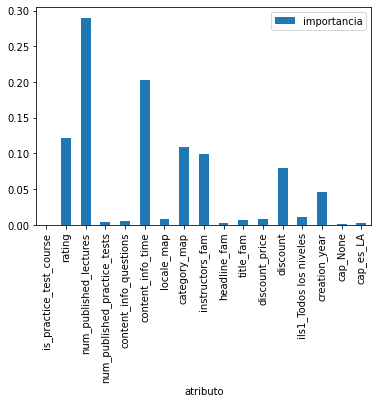

In [ ]:
pd.DataFrame({'atributo': clf.feature_names_in_, 'importancia': clf.feature_importances_}).plot.bar(x="atributo", y="importancia");

###Diagnóstico

Parece que siempre queda como bestseller == 'no'

In [ ]:
s_pred = pd.Series(y_pred, index = y_holdout.index)
print((s_pred == 'si').sum(),(y_holdout == 'si').sum())
if(not is_practice_test_course_filter in ['practice','non_practice']):  
  mask = X_holdout.is_practice_test_course
  print(sk.metrics.accuracy_score(y_holdout.loc[mask], s_pred.loc[mask]))
  print((s_pred.loc[mask] == 'si').sum(),(y_holdout.loc[mask] == 'si').sum())
  #print(sk.metrics.classification_report(y_holdout.loc[mask], s_pred.loc[mask]))

86 432
0.8148148148148148
0 5


In [ ]:
mask = X_holdout.rating < 5
print(sk.metrics.accuracy_score(y_holdout.loc[mask], s_pred.loc[mask]))
print((s_pred.loc[mask] == 'si').sum(),(y_holdout.loc[mask] == 'si').sum())

0.8160975609756097
86 431


In [ ]:
y_holdout.value_counts()

no    1775
si     432
Name: bestseller, dtype: int64

In [ ]:
s_pred.value_counts()

no    2121
si      86
dtype: int64

##Predicción

In [ ]:
X_prueba = df_test.copy()

#espacio de aprendizaje supervisado (por ejemplo, para analizar instructores y subcategorías)
if(significance_level):  
  X, X_prueba = instructors_significant(X,X_prueba,y, instructors_df,df.instructors, significance_level)
if(n_best_instructors):
  X, X_prueba = bestseller_instructor(X,X_prueba,y, instructors_df,df.instructors, n_best_instructors)
if(n_best_subcategories):
  X, X_prueba = bestseller_subcategory(X,X_prueba,y,df.subcategory, n_best_subcategories)
if(add_instructor_odds):
  X, X_prueba = instructors_likelihood(X,X_prueba,y,instructors_df)
if(add_subcategory_odds):
  X, X_prueba = subcategory_likelihood(X,X_prueba,y,df.subcategory)


# Datos a predecir 
X_prueba = X_prueba[X.columns]#df_test.columns.drop('bestseller')]

# Entrenamos el modelo con todos los datos
clf.fit(X, y)

# Predecimos
X_prueba['bestseller'] = clf.predict(X_prueba)

# Grabamos
if(is_practice_test_course_filter == 'practice'):
  X_prueba['bestseller'].to_csv('/content/solucion_preguntas.csv')
elif(is_practice_test_course_filter == 'practice'):
  X_prueba['bestseller'].to_csv('/content/solucion_tiempo.csv')
elif(development_filter == 1):
  X_prueba['bestseller'].to_csv('/content/solucion_1.csv')
elif(development_filter == 2):
  X_prueba['bestseller'].to_csv('/content/solucion_2.csv')
elif(development_filter == 3):
  X_prueba['bestseller'].to_csv('/content/solucion_3.csv')
else:
  X_prueba['bestseller'].to_csv('/content/solucion.csv')

In [ ]:
X_prueba[X_prueba['bestseller'] == "si"]

,is_practice_test_course,rating,num_published_lectures,num_published_practice_tests,content_info_questions,content_info_time,locale_map,category_map,instructors_fam,headline_fam,title_fam,discount_price,discount,ils1_Todos los niveles,creation_year,cap_None,cap_es_LA,bestseller
id,,,,,,,,,,,,,,,,,,
11089,False,4.878622,380,0,0,43.5,20,1,False,True,False,12.0,77.99,1,2021,0,1,si
11139,False,4.789487,314,0,0,30.5,20,1,False,True,True,12.0,7.99,1,2021,0,1,si
11155,False,4.497955,284,0,0,30.5,16,1,False,True,False,12.0,77.99,1,2021,0,0,si
11239,False,4.626189,34,0,0,5.0,16,2,True,True,False,12.0,27.99,1,2021,0,0,si
11248,False,4.657339,89,0,0,10.0,16,8,True,True,False,12.0,82.99,1,2021,0,0,si
